# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## 1 Explicit calculation of the Lagrange multiplier

In [1]:
%matplotlib inline
import time
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
import matplotlib as mpl
from Models.models import *
from utils.SolutionDemo import *
sp.init_printing()
mpl.rcParams['figure.dpi'] = 150
repo_dir = os.path.dirname(os.getcwd())

### Quadruple Pendulum

In [2]:
m=[1, 1, 1, 1]
l=[1, 1, 1, 1]
Four_Model = ExplictModel(m=m, l=l,close_chain=False)
y = np.append([0.5, 0, 0, 1.5, 0, 0, 2.5, 0, 0, 3.5, 0, 0], np.zeros(3*len(m)))
g = np.tile([0, -9.81, 0], len(m))
f = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### System constrains:

### System governing equations

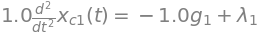

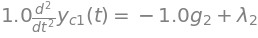

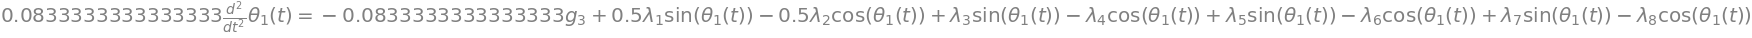

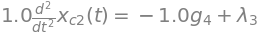

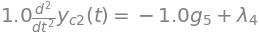

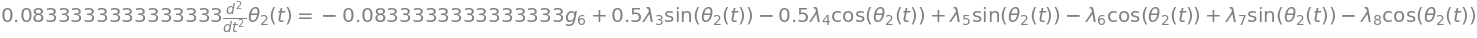

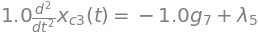

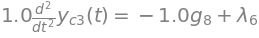

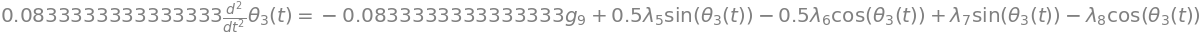

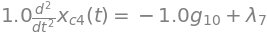

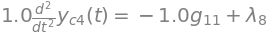

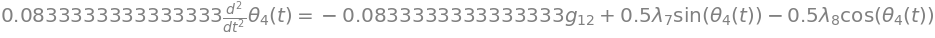

In [4]:
print_constrains(Four_Model)
print_govs(Four_Model, f)

In [3]:
ode = 'DOP853'
sol = solve_ivp(Four_Model.sim, [0, 10], y, method=ode, args=(f, g))
FourPend = SolutionDemo(sol, m, l, rot=None)
print(FourPend.links.shape)

(4, 135, 2, 2)


In [4]:
FourPend.play_IPython(title=ode)

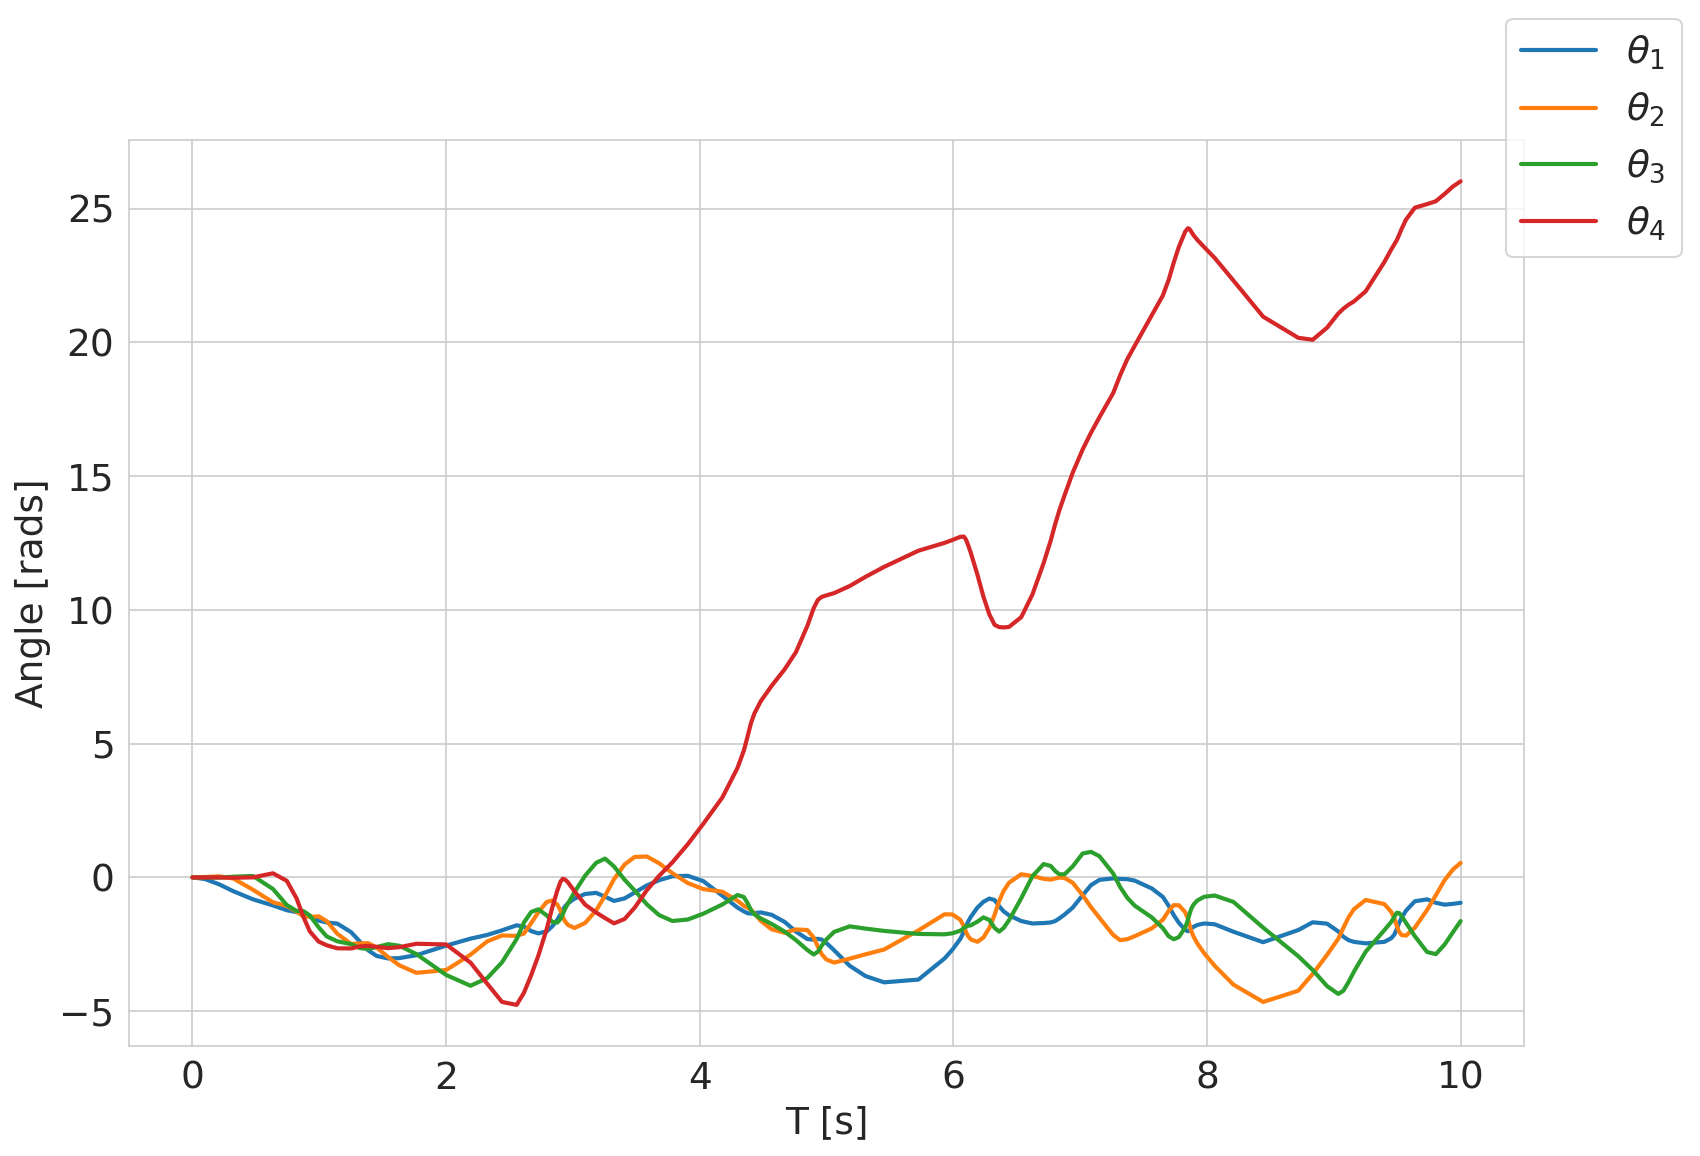

In [5]:
FourPend.plot_angles()

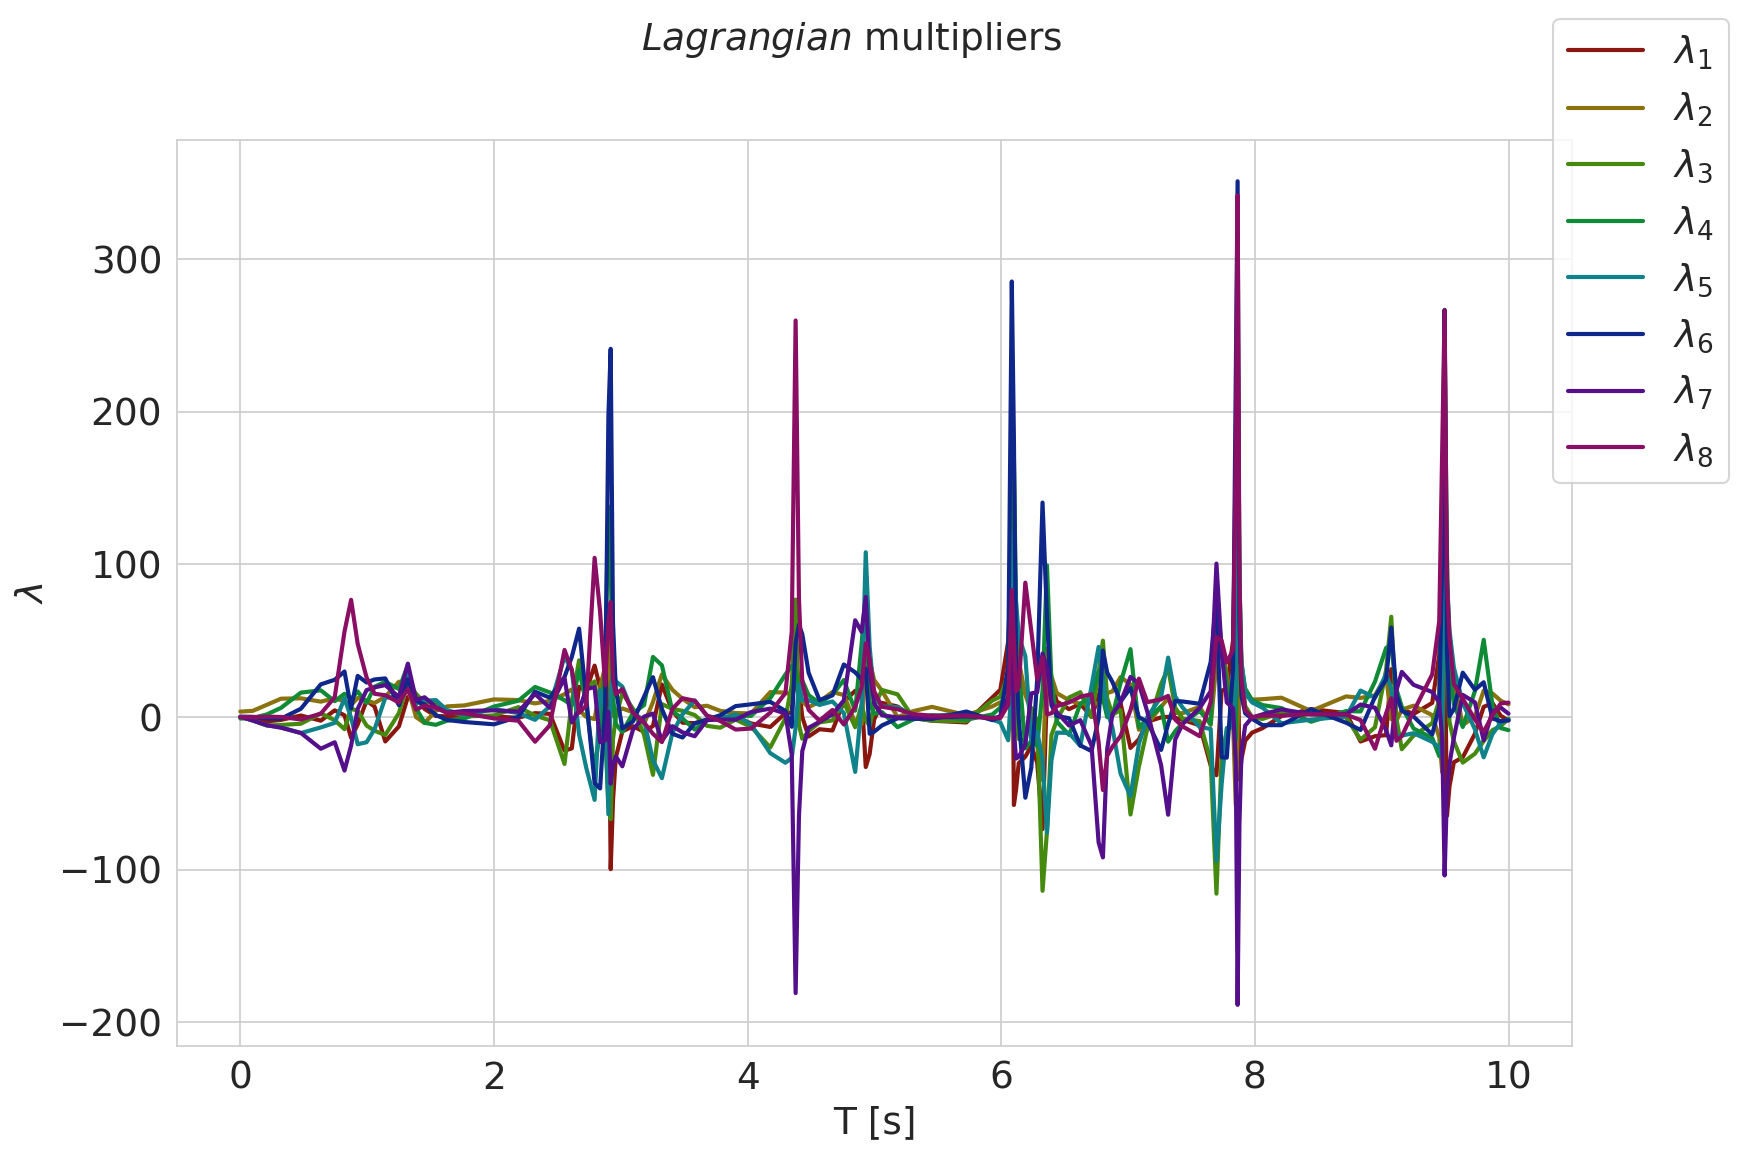

In [7]:
multipliers = get_multipliers(Four_Model, f, g, sol, show=True)